
### Project Introduction and Description - Titanic Dataset

1. You should start by taking a look at your dataset and brainstorming what questions you could answer using it.
2. Then you should use Pandas and NumPy to answer the questions you are most interested in, and create a report sharing the answers. 

This project is open-ended in that we are not looking for one right answer.

Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 
You can view a description of this dataset on the Kaggle website, where the data was obtained.
https://www.kaggle.com/c/titanic/data

### Table of Content:
    1. Quality of Analysis - Questions
    2. Data Wrangling - Data Investigation and Cleaning
        2.1. Overview of the dataset
        2.2. Removing unnecessary columns
        2.3. Dealing with NaN values in Age
        2.4. Dealing with NaN values in Embarked
        2.5. Merging Siblings and Parents Columns to One Cloumn Named Family
        2.6. Getting the final view of the table after cleaning up the data
    3. Exploration - Visualizations and Statistical Summaries
        3.1. Plots
        3.2. Correlations
        3.3. Confidence Intervals
    4. Limitations of the Analysis
        4.1. Missing Values in the Age Category
        4.2. Limitations of Making Assumptions without Statistical Testing
        4.3. Does Correlation Mean Causation?
        4.4. Any Other Data That Could Help in the Analysis
    5. Conclusions - Communication of Findings
        5.1. Findings on Cabin
        5.2. Findings on Family
        5.3. Findings on Women
        5.4. Findings on Age
    6. References

### 1. Quality of Analysis - Questions

1. How does the class rank (1st, 2nd, 3rd) correlates with the rate of survival?
2. Did those who were a family have a higher chance or survival than those who were travelling alone?
3. How did the rate of survival differ among women in the difference classes? (i.e. number of women in a higher class who survived were more than women who survived but were in a a lower class rate)
4. How does age correlates with the rate of survival?


### 2. Data Wrangling - Data Investigation and Cleaning

In [4]:
#The initial imports

import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To show visualizations in iPython
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### 2.1. Overview of the dataset

In [6]:
#Get and read the titatic data
titanic_df = pd.read_csv('/Users/nazaninmirarab/Desktop/Data Science/P2/titanic_data.csv')

#Preview the first 5 rows of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Getting some information about the numbers and types of the data available in the CSV file
titanic_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### 2.2. Removing unnecessary columns

As shown in the information executed above, the number of PassengerID, Survived, PClass, Name, Sex, SibSp, Parch, Ticket and Fare are all equal, meaning that information is available for all of them.

However, for Cabin numbers, there are quite many NaN values. Therefore, I decided to remove the Cabin variable since it has a lot of NaN values and is not included in any of the calculations in my analysis. I also remove Name and Ticket columns to make the table less corwded since I do not use them in my analysis

In [8]:
#dropping Cabin field from the table
titanic_df.drop('Cabin', axis=1, inplace=True)

#removing Name and Ticket columns
titanic_df.drop(['Ticket', 'Name'], axis=1, inplace=True)

In [9]:
#Getting a new view of the Titanic dataset without the Cabin column included
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### 2.3. Dealing with NaN values in Age

The number of Ages available in the CSV file is 714, which means not all the passengers' ages have been specified. This is also visible from the first 10 rows of the data I printed out earlier. Some Ages are equal to NaN.

Mean: 29.6991176471
Median: 28.0
Standard Deviation: 14.5163211508
Number of Nulls: 177


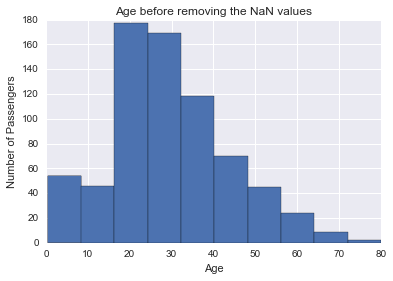

In [10]:
#get a histogram from the current Age values (including NaNs)
plt = titanic_df['Age'].hist()
plt.set_title('Age before removing the NaN values')
plt.set_xlabel('Age')
plt.set_ylabel('Number of Passengers')

#Calculating the mean, standard deviation for the current Age values (including NaNs)
mean_titanic = titanic_df['Age'].mean()
median_titanic = titanic_df['Age'].median()
standard_deviation_titanic = titanic_df['Age'].std(ddof=0)
num_of_nulls_titanic = titanic_df['Age'].isnull().sum()

print 'Mean:', mean_titanic
print 'Median:', median_titanic
print 'Standard Deviation:', standard_deviation_titanic
print 'Number of Nulls:', num_of_nulls_titanic

This chart shows the distribution of the age of passengers. based on the plot passengers were mostly between 20 to 40 years old.

---------------------------------------------------------------------------------------------------------------------

To resolve the issues with NaN values in Age, I substitute them with random numbers I generated based on the difference between the average age and the standard deviation calculated in the previous step.

I use the np.random.randint to return random integers between 2-standard deviation below and above the mean. I used 2-standard deviation so that the numbers generated can have a wider range.

http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html#numpy.random.randint

In [11]:
#creating a new column Age_new to keep the current Age as is and add random ages to Age_new
titanic_df['Age_new'] = titanic_df['Age']

In [12]:
#generating random numbers between 2-std below and 2-std above the mean
rand_age = np.random.randint(mean_titanic - (2 * standard_deviation_titanic), mean_titanic + (2 * standard_deviation_titanic), size = num_of_nulls_titanic)

#replacing the NaN values with the random numbers. 
titanic_df['Age_new'][np.isnan(titanic_df['Age_new'])] = rand_age

#Getting info to make sure the Age_new variable is added with the NaN values filled
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Age_new        891 non-null float64
dtypes: float64(3), int64(5), object(2)
memory usage: 69.7+ KB


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                 Age_new
Sex    Pclass           
female 1       33.489362
       2       29.098684
       3       24.496528
male   1       40.298525
       2       30.808611
       3       27.479597


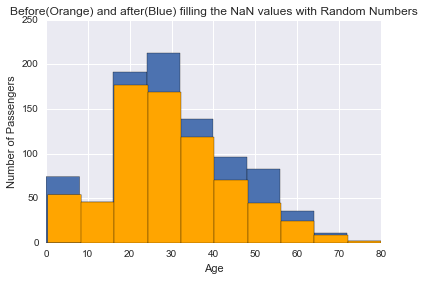

In [13]:
#Changing the data type from object to float64
pd.to_numeric(titanic_df['Age_new'])
titanic_df['Age_new'].astype(numpy.int64)

#The new histogram of Ages_new with NaN values being filled by random numbers
plt = titanic_df['Age_new'].hist()
plt.set_title('Before(Orange) and after(Blue) filling the NaN values with Random Numbers')
plt.set_xlabel('Age')
plt.set_ylabel('Number of Passengers')

#doing a comparison between how the ages of the passengers look after filling the NaN values with random numbers
plt = titanic_df['Age'].hist(color='Orange')

#Grouping the passengers' average age based on their Sex and Cabin rank 
print titanic_df.groupby(['Sex','Pclass'])[['Age_new']].mean()


This chart shows a comparison of the distribution of the age of passengers after the NaN values are filled with the random numbers generated in the previous steps. The blue-color plot shows that the distribution has remained more or less the same, but now there are more ages to work with for the analysis.

#### 2.4. Dealing with NaN values in Embarked


The Port of Embarkation is also missing for 2 passengers, for which the values are set to NaN. I check which of the three letters in embarked (C,Q,S) is the most repeated one, and I fill in the two NaN values with the most repeated letter.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


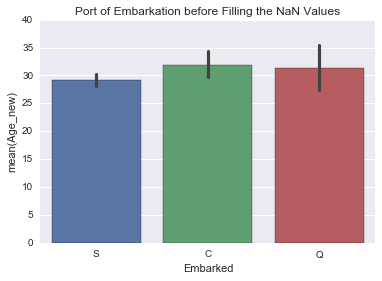

In [14]:
#which of the three letters in embarked (C,Q,S) is the most repeated one
print titanic_df['Embarked'].value_counts()

#a histogram from the current Embarked values (including NaNs) based on Age
plt = sns.barplot(y="Age_new", x="Embarked", data=titanic_df)
plt.set_title('Port of Embarkation before Filling the NaN Values')

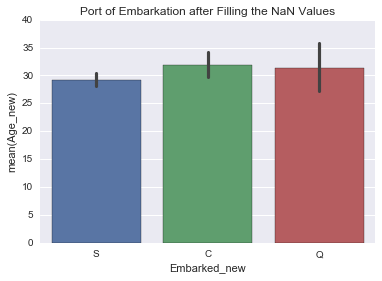

In [15]:
#fill in the two NaN values in Embarked with the most repeated letter
titanic_df['Embarked_new'] = titanic_df['Embarked'].fillna('S')

#new histogram of Embarked_new with NaN values being filled by the most repeated letter, 'S'
plt = sns.barplot(y="Age_new", x="Embarked_new", data=titanic_df)
plt.set_title('Port of Embarkation after Filling the NaN Values')

This chart shows the distribution of points of embarkation after the two NaN values have been filled with the most repeated letter 'S'. Since there were only 2 values that needed to be filled, the distribution of embarkations in the chart has no significant change.

In [16]:
#Getting a new view of the dataset information to see how the changes have been applied
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
Embarked        889 non-null object
Age_new         891 non-null float64
Embarked_new    891 non-null object
dtypes: float64(3), int64(5), object(3)
memory usage: 76.6+ KB


In [17]:
#Get some info about the Embarked and Embarked_new lists

print 'Embarked'
print titanic_df['Embarked'].describe()
print '---------------------------------'
print 'Embarked_new'
print titanic_df['Embarked_new'].describe()

Embarked
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
---------------------------------
Embarked_new
count     891
unique      3
top         S
freq      646
Name: Embarked_new, dtype: object


---------------------------------------------------------------------------------------------------------------------

Executing the following cell will cause an error, but the error is because of the NaN values. I however included the NaN values analysis in this cell just to show how filling them with the median changed calculations.

In [18]:
#Get some info about the Age and Age_new lists. 
print 'Age'
print titanic_df['Age'].describe()
print '---------------------------------'
print 'Age_new'
print titanic_df['Age_new'].describe()

Age
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64
---------------------------------
Age_new
count    891.000000
mean      29.928361
std       15.056138
min        0.000000
25%       20.000000
50%       28.000000
75%       40.000000
max       80.000000
Name: Age_new, dtype: float64


//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


#### 2.5. Merging Siblings and Parents Columns to One Cloumn Named Family

Adding Siblings and Children column together as one whole Family column. Using the Family column, I will do the analysis of how likely people were to survive in case they had any family members.

I got the idea to do this from one of the submissions on Kaggle:

https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/comments

In [19]:
#merging the siblings and parents columns to one column named Family
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']

#Dropping SibSp and Parch as now they are merged together by Family
titanic_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

#Dropping Age and Embarked columns since I do the analysis on Age_new and Embarked_new columns
titanic_df.drop(['Age', 'Embarked'], axis=1, inplace=True)

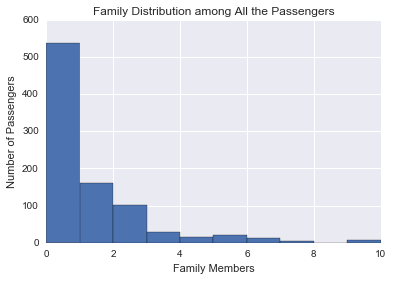

In [20]:
plt = titanic_df['Family'].hist()
plt.set_title('Family Distribution among All the Passengers')
plt.set_xlabel('Family Members')
plt.set_ylabel('Number of Passengers')

This chart shows the distribution of passengers with family members after the siblings and parents columns have been merged together. The chart shows that the number of passengers with zero to 2/3 family members are more.

#### 2.6. Getting the final view of the table 

In [21]:
#Getting a new view of the table with Age_new, Embarked_new and Family columns added
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Fare,Age_new,Embarked_new,Family
0,1,0,3,male,7.2500,22.0,S,1
1,2,1,1,female,71.2833,38.0,C,1
2,3,1,3,female,7.9250,26.0,S,0
3,4,1,1,female,53.1000,35.0,S,1
4,5,0,3,male,8.0500,35.0,S,0



Below, I have printed out some general statistics for different fields of the table based on the rate of survival.

In [23]:
print titanic_df.groupby(['Pclass'])[['Survived']].count()
print '----------------------------------------------------------------------------------------'
print titanic_df.groupby(['Pclass', 'Sex'])[['Age_new']].count()
print '----------------------------------------------------------------------------------------'
print titanic_df.groupby(['Sex'])[['Survived']].count()
print '----------------------------------------------------------------------------------------'
print titanic_df.groupby(['Family'])[['Survived']].count()

        Survived
Pclass          
1            216
2            184
3            491
----------------------------------------------------------------------------------------
               Age_new
Pclass Sex            
1      female       94
       male        122
2      female       76
       male        108
3      female      144
       male        347
----------------------------------------------------------------------------------------
        Survived
Sex             
female       314
male         577
----------------------------------------------------------------------------------------
        Survived
Family          
0            537
1            161
2            102
3             29
4             15
5             22
6             12
7              6
10             7


### 3. Exploration - Visualizations and Statistical Summaries

#### 3.1. Plots

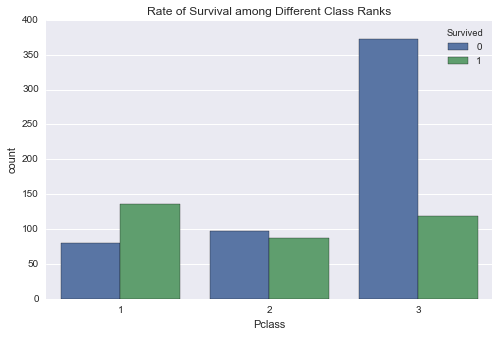

In [24]:
#Cabin 

import matplotlib.pyplot as plt

#A plot that shows the rate of survival among the 3 class ranks
fig, axes = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')
plt = sns.countplot(x="Pclass", hue='Survived', data=titanic_df)
plt.set_title('Rate of Survival among Different Class Ranks')

This chart shows that the rate of survival for cabin rank 1 was the highest. Cabin rank 3 had the lowest rate of survival.

----------------------------------------------------------------------------------------------------------------------

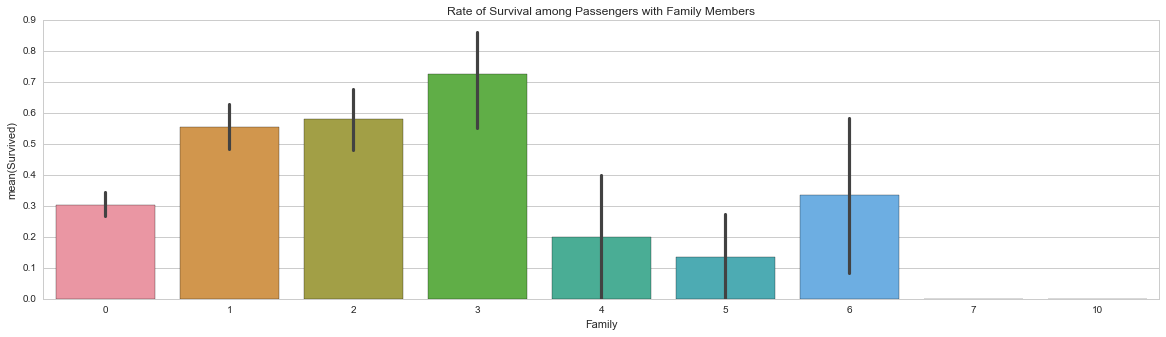

In [25]:
#Family

import matplotlib.pyplot as plt

#A plot that shows the rate of survival among those passengers with family members
fig, axes = plt.subplots(figsize=(20,5))
sns.set_style('whitegrid')
plt = sns.barplot(x="Family", y='Survived', data=titanic_df)
plt.set_title('Rate of Survival among Passengers with Family Members')

This chart shows that the rate of survival for families with 3 family members were the highest. There is no other significant analysis we can conclude based on this chart.

----------------------------------------------------------------------------------------------------------------------

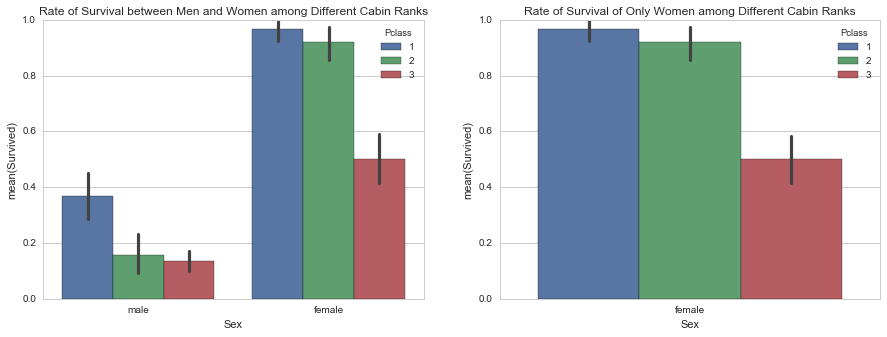

In [26]:
#Sex

import matplotlib.pyplot as plt

#To be able to draw two plots in the same ipython cell
fig, axs = plt.subplots(1,2, figsize=(15,5))

#A plot that shows the rate of survival between men and women among the 3 different classes
sns.set_style('whitegrid')
plt = sns.barplot(y="Survived", x="Sex", hue='Pclass', data=titanic_df, ax=axs[0])
plt.set_title('Rate of Survival between Men and Women among Different Cabin Ranks')

#A plot from only women who survived among different cabin classes 
plt = sns.barplot(y="Survived", x = "Sex", hue='Pclass', data = titanic_df[titanic_df['Sex'] == 'female'], ax=axs[1])
plt.set_title('Rate of Survival of Only Women among Different Cabin Ranks')

These charts show that overall, women had a higher chance of survival in each cabin rank. Women from cabin rank 1 had the highest rate of survival among all.

----------------------------------------------------------------------------------------------------------------------

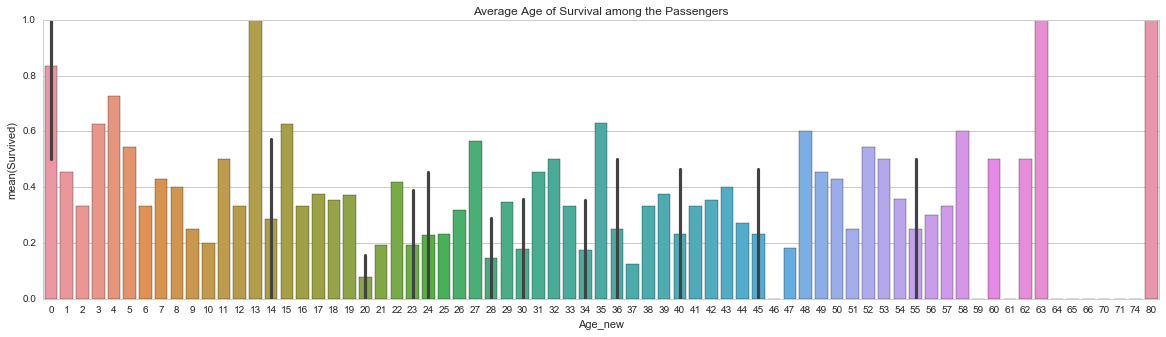

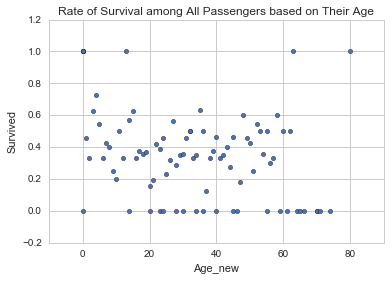

In [27]:
#Age

import matplotlib.pyplot as plt

#A bar plot that shows the rate of survival among different ages using the average age
fig, axes1 = plt.subplots(1,1, figsize=(20,5))
sns.set_style('whitegrid')
average_age = titanic_df[['Age_new', 'Survived']].groupby(['Age_new'], as_index=False).mean()
average_age['Age_new'] = average_age['Age_new'].astype(numpy.int64)
plt = sns.barplot(x='Age_new', y='Survived', data=average_age)
plt.set_title('Average Age of Survival among the Passengers')

#A scatter plot of the rate of survival based on average age
plt = average_age.plot(kind='scatter', x='Age_new', y='Survived')
plt.set_title('Rate of Survival among All Passengers based on Their Age')

From the scatter plot drawn above, we can see that the number of survivals between age of 0 and 20 seems to be more than the rest. However, this cannot solely be a measure to conclude that people younger than 20 had a higher chance of survival.

----------------------------------------------------------------------------------------------------------------------

#### 3.2. Correlations

In [28]:
#Writing a function to calculate correlations between different variables
def correlation(x, y):
    standardized_x = (x - x.mean()) / x.std(ddof=0)
    standardized_y = (y - y.mean()) / y.std(ddof=0)
    
    return (standardized_x * standardized_y).mean()

pclass_rate = titanic_df['Pclass']
survived_rate = titanic_df['Survived']
age_rate = titanic_df['Age_new']
embarked_rate = titanic_df['Embarked_new']
family_rate = titanic_df['Family']

#Cabin
#How does the class rank (1st, 2nd, 3rd) correlates with the rate of survival?
print '\nClass rate correlation with rate of survival: ', correlation(pclass_rate, survived_rate)

#Family
#Did those who were a family have a higher chance or survival than those who were travelling alone?
print '\nFamily members correlation with rate of survival: ', correlation(family_rate, survived_rate)

#Women
#How did the rate of survival differ among women in the difference classes? 
#(i.e. number of women in a higher class who survived were more than women who survived but were in a a lower class rate)
print '\nRate of survival among women in different cabin classes: ', correlation ((titanic_df['Sex'] == 'female'), survived_rate)

#Age
#How does age correlates with the rate of survival?
print '\nAge correlation with rate of survival: ', correlation(age_rate, survived_rate)



Class rate correlation with rate of survival:  -0.338481035961

Family members correlation with rate of survival:  0.0166389892827

Rate of survival among women in different cabin classes:  0.543351380658

Age correlation with rate of survival:  -0.0538055712561


#### 3.3. Confidence Intervals

In [29]:
#Importing the statistical package scipy to do the confidence intervals (CI) for the above questions
from scipy import stats

print '\nThe CI between Pclass and Survival rate: \n', stats.pearsonr(titanic_df['Survived'], titanic_df['Pclass'])
print '\nThe CI between Family and Survival rate: \n', stats.pearsonr(titanic_df['Survived'], titanic_df['Family'])
print '\nThe CI between Age and Survival rate: \n', stats.pearsonr(titanic_df['Survived'], titanic_df['Age_new'])
print '\nThe CI between Females\'s survival rate among different classes: \n', stats.pearsonr(titanic_df['Survived'], (titanic_df['Sex'] == 'female'))
print '\nThe CI between Males\'s survival rate among different classes: \n', stats.pearsonr(titanic_df['Survived'], (titanic_df['Sex'] == 'male'))


The CI between Pclass and Survival rate: 
(-0.33848103596101536, 2.5370473879804202e-25)

The CI between Family and Survival rate: 
(0.016638989282745237, 0.61989112213449693)

The CI between Age and Survival rate: 
(-0.053805571256140404, 0.10849730626196291)

The CI between Females's survival rate among different classes: 
(0.54335138065775523, 1.4060661308795969e-69)

The CI between Males's survival rate among different classes: 
(-0.54335138065775535, 1.4060661308795171e-69)


### 4. Limitations of the Analysis

#### 4.1. Missing Values in the Age Category

From the 891 passengers available on the ship, 177 were missing the values of their ages, which is roughly around 20% of the whole data. To make up for this limitation in the analysis there were multiple ways to deal with the missing data. For example:

- Removing the NaN values and work with only 714 number of ages for the analysis
- Filling in the NaN values with a constant variable, such as the median
- Filling in the NaN values with random variables, based on mean and the standard deviation

I chose the 3rd option because I did not want to work with only 80% of the data when doing analysis on the age and rate of survival. On the other hand I did not choose using the median since it could change the normal distribution significantly. Therefor, I went for using random numbers generated by 2-standard deviation above and 2-standard deviation below the mean. This way, I could still keep the shape of the distribution, as well as not losing 177 passengers' data.

However, replacing the NaN values with random numbers mean that we still do not have the actual numbers to work with, and this can cause errors in the conclusion and the correlations made.

#### 4.2. Limitations of Making Assumptions without Statistical Testing

The reliability of statistical relationships has an effect on the judgements we make about a population. Some examples of these statistical inferences are calculating confidence intervals, or doing hypothesis testing. In this project, I have calculated confidence intervals and used it as one measure of judgement about the data. Also, using plots and calculating the correlations helped me with making conclusions. However, these cannot solely be the measures to conclude any judgement with high probability.

I had a limitation of performing hypothesis testing (the t-test) on this data. The reason for that was that the survival rate between the variables were significant. It was either 0 or 1 which could not give me a normal distribution to work with.

Lack of hypothesis testing (e.g. t-test) can be a limitation in the assumptions we make about the data.

#### 4.3. Does Correlation Mean Causation?

The phrase 'Correlation does not imply causation' shows clearly how we cannot base our judgements only because two variables correlate with each other. There are many examples, in which two variables correlate with each other perfectly, but no assumption can be done based on them. (Take a look at here for some examples:
http://www.fastcodesign.com/3030529/infographic-of-the-day/hilarious-graphs-prove-that-correlation-isnt-causation )

Due to this limitation, by the correlation I get from the data in this dataset, I cannot imply causation. This means, for instance, if the age of passengers had a correlation with their rate of survival, only this does not imply that people who were younger were mostly those who survived.

#### 4.4. Any Other Data That Could Help in the Analysis

I think if we had the data from the people who actually got on the boat and the boats who were found and survived, this could also be a measure of analysis.


---------------------------------------------------------------------------------------------------------------------

### 5. Conclusions - Communication of Findings

#### 5.1. Findings on Cabin

In section 3.1 the plot shows that rate of survival is significantly lower for those passengers coming from a lower cabin rank (i.e. 3). It also shows that the number of those who survived from cabin class 1 was higher than those who didn't survive from the same cabin rank.

In section 3.2 calculating the correlation between the cabin rank and the rate of survival, the -0.33 number shows a negative correlation between the cabin class rank and rate of survival. Those with a cabin class rank 1 (lower in number, but high in rank) had a higher chance of survival.

Conclusion: The plot and the caluclations on correlation for the rate of survival based on different cabin ranks, show that the higher the cabin rank (i.e. 1) the higher the chance of survival. Although all this information shows this correlation, I am not still sure if the correlation can be significant; meaning a higher cabin rank resulted in a higher chance of survival.

#### 5.2. Findings on Family

In section 3.1 the plot shows that rate of survival for those with 3 family members is more than any other gorups, but the plot doesn't show any correlations between the number of family members and rate of survival.

In section 3.2 according to the calculations for the correlation the 0.01 number shows a very small correlation between the number of family members and the rate of survival.

Conclusion: The plot and the calculations on correlation do not show a strong correlation between the number of family members and their rate of survival.

#### 5.3. Findings on Women

In section 3.1 the plot shows that the rate of survival of women is more than men, and respectively the rate of survival of women among different cabin ranks is also different. Women from higher cabin ranks had a higher chance os survival.

In section 3.2. calculating the correlation shows a positive 0.54 correlation for women and their rate of survival.

Conclusion: The plot and the calculations on correlation show that there is a positive correlation for women and their rate of survival, comparing to men. Although all this information shows this correlation, I am not still sure if the correlation can be significant.

#### 5.4. Findings on Age

In section 3.1 there are 2 plots drawn for Age category. The barplot shows the average age and the rate of survival based on that, and the scatter plot shows how different ages are distributed. Based on the scatter plot, we can see that the distribution of survival rate between 0 and 20 is more than the rest of the plot. However, this might be due to the fact that there were more people between this age frame (0,20) on the titanic ship than, let's say, people over 70.

In section 3.2 the calculation of correlations show a negative -0.06 correlation between age and the rate of survival; meaning the older a passenger was, the less chance for survival.

Conclusion: Based on the plot, the calculation for correlation, and limitation of the analysis, we can't show a significant correlation between age and the rate of survival. Based on only this information, we cannot indicate whether the younger a passenger was, he/she had a higher chance of survival.


### 6. References

The list of references mentioned here are only about those that gave me hints/tips on how to move foreward. For example, I used many links for Pandas documentation, or searched through Stack Overflow but have not included them in the references.

http://pandas.pydata.org/pandas-docs/version/0.15.2/missing_data.html#cleaning-filling-missing-data
https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html
https://discussions.udacity.com/t/resources-for-correlation-between-variables/43731
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html
http://www.scipy-lectures.org/packages/statistics/index.html
http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#scatter-plot
https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/discussion